<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Deep_learnng_project_Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(train_targets.shape)

(404, 13)
(404,)


In [4]:
std = train_data.std(axis=0)
print(std)

[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

(array([ 3.,  3.,  9.,  9., 11., 28., 22., 20., 30., 42., 39., 39., 40.,
        18.,  6., 11., 10., 10., 11.,  5.,  5.,  6.,  1.,  1.,  3.,  2.,
         3.,  1.,  1., 15.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ,
        21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5,
        38. , 39.5, 41. , 42.5, 44. , 45.5, 47. , 48.5, 50. ]),
 <BarContainer object of 30 artists>)

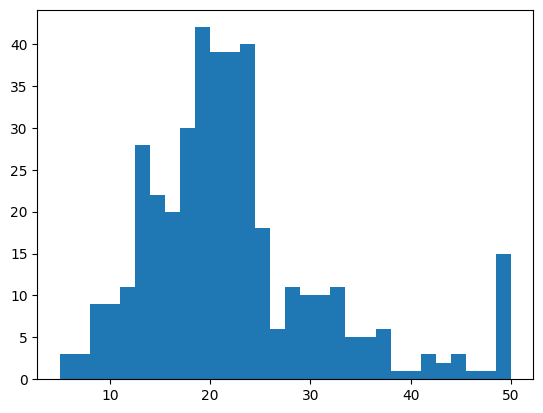

In [6]:
import matplotlib.pylab as plt
print(train_targets)
plt.hist(train_targets, 30)

In [11]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [9]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Input(train_data.shape[1]))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam'
, loss='mse'
, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(train_data, train_targets,
validation_data=(test_data, test_targets),
                    batch_size=32,
                    epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 20ms/step - loss: 560.9390 - mae: 21.7945 - val_loss: 558.9598 - val_mae: 21.8137
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 503.8248 - mae: 20.4725 - val_loss: 497.5881 - val_mae: 20.3893
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 436.7189 - mae: 18.8340 - val_loss: 416.6578 - val_mae: 18.3744
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 348.5485 - mae: 16.5074 - val_loss: 315.9203 - val_mae: 15.6601
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 249.3235 - mae: 13.4858 - val_loss: 209.7578 - val_mae: 12.4252
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 156.1828 - mae: 10.0283 - val_loss: 130.9703 - val_mae: 9.6420
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 101.0261 - mae: 7.7083 - val_loss: 90.5772 - val_mae: 7.6738
Epoch 8/200
13/13 [=========================

In [22]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.datasets import boston_housing
from tensorflow import keras

# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[test_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[test_idx]

    model = create_model()
    model.fit(X_fold_train, y_fold_train, epochs=100, batch_size=32, verbose=0)

    loss, mae = model.evaluate(X_fold_val, y_fold_val)
    print(f'Fold Loss: {loss}, Fold Mean Absolute Error: {mae}')

3/3 [==============================] - 0s 5ms/step - loss: 12.5773 - mae: 2.5950
Fold Loss: 12.57730770111084, Fold Mean Absolute Error: 2.595032215118408
3/3 [==============================] - 0s 5ms/step - loss: 8.7503 - mae: 2.2977
Fold Loss: 8.750284194946289, Fold Mean Absolute Error: 2.297687530517578
3/3 [==============================] - 0s 5ms/step - loss: 17.9006 - mae: 2.4952
Fold Loss: 17.900602340698242, Fold Mean Absolute Error: 2.4951894283294678


3/3 [==============================] - 0s 7ms/step - loss: 11.1551 - mae: 2.4998
Fold Loss: 11.155147552490234, Fold Mean Absolute Error: 2.4997611045837402


3/3 [==============================] - 0s 4ms/step - loss: 10.6909 - mae: 2.5296
Fold Loss: 10.690936088562012, Fold Mean Absolute Error: 2.529601573944092
